In [595]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

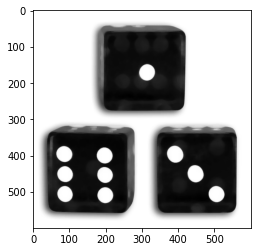

In [596]:
original_img = cv2.imread('input/2.jpg')
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(gray_img, 11)

plt.imshow(gray_img, cmap='gray')

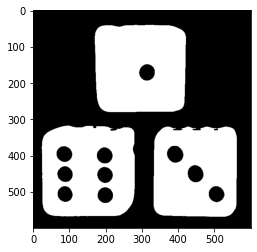

In [597]:
thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 501, 2)
plt.imshow(thresh, cmap='gray')

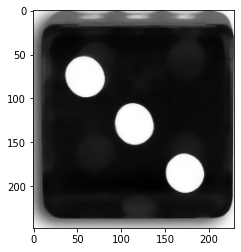

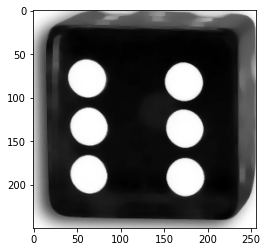

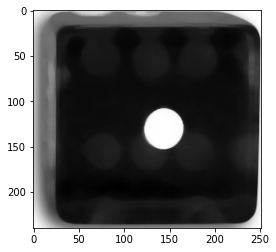

In [598]:
contours, _= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
dices = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    dices.append(gray_img[y:y+h, x:x+w])

for dice in dices:
    plt.imshow(dice, cmap='gray')
    plt.show()

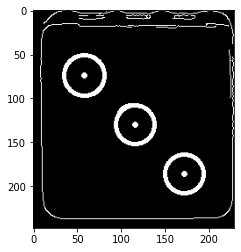

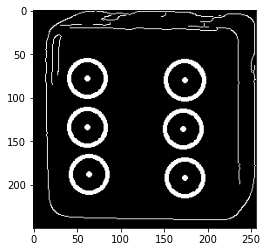

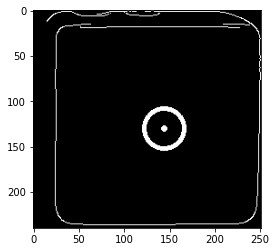

In [599]:
counter = [0 for i in range(len(dices))]
for i, dice in enumerate(dices):
    median = np.median(dice)
    min_threshold = 0.66 * median
    max_threshold = 1.33 * median

    dice = cv2.Canny(dice, min_threshold, max_threshold)

    circles = cv2.HoughCircles(dice, cv2.HOUGH_GRADIENT, 1, 10, param1 = 100, param2=30, minRadius=5, maxRadius=60)
    circles = np.uint8(np.around(circles[0, :]))

    for c in circles:
        x, y, radius = c[0], c[1], c[2]
        cv2.circle(dice, (x, y), radius, (255, 255, 255), 4)
        cv2.circle(dice, (x, y), 2, (255, 255, 255), 2)
        counter[i] += 1
    
    i += 1
        
    plt.imshow(dice, cmap='gray')
    plt.show()

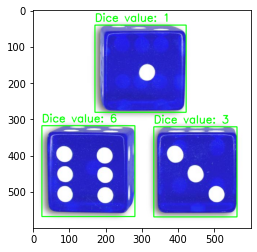

In [600]:
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(original_img, f"Dice value: {counter[i]}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
plt.imshow(original_img)